# Bloch Sphere

This notebook is used to generate some of the figures used in the paper

In [2]:
from qiskit.visualization.bloch import Bloch
from notebook_utils import DIR_PREFIX

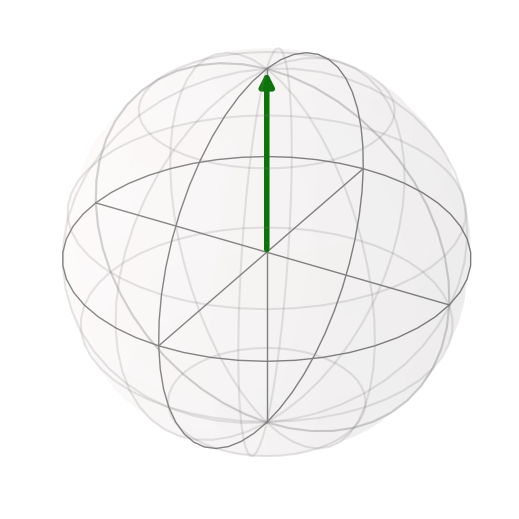

In [8]:
_bloch = Bloch()
_bloch.vector_color = ['#027101', 'green', 'blue']
_bloch.sphere_alpha = 0.05
_bloch.vector_width = 4
_bloch.xlabel = ['', ' ']
_bloch.ylabel = ['', ' ']
_bloch.zlabel = ['','']
sv = []
sv.append([0,0,1])

_bloch.add_vectors(sv)
_bloch.save(f"{DIR_PREFIX}images/qs.png")
_bloch.render()


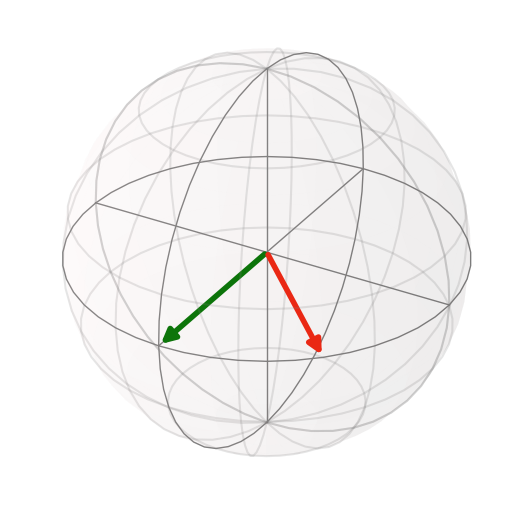

In [10]:
_bloch = Bloch()
_bloch.vector_color = ['#027101', '#ED220D', '#ED220D']
_bloch.sphere_alpha = 0.05
_bloch.vector_width = 4
_bloch.xlabel = ['', ' ']
_bloch.ylabel = ['', ' ']
_bloch.zlabel = ['','']
sv = []
sv.append([1,0,0])
sv.append([0.70710678118,0.70710678118,0])


_bloch.add_vectors(sv)

_bloch.save(f"{DIR_PREFIX}images/traj1.png")
_bloch.render()


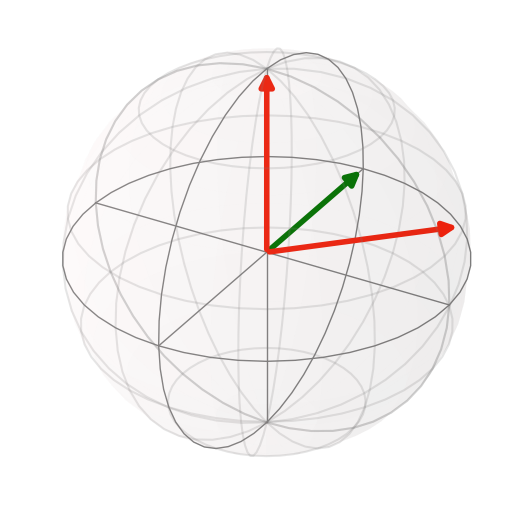

In [14]:
_bloch = Bloch()
_bloch.vector_color = ['#027101', '#ED220D', '#ED220D']
_bloch.sphere_alpha = 0.05
_bloch.vector_width = 4
_bloch.xlabel = ['', ' ']
_bloch.ylabel = ['', ' ']
_bloch.zlabel = ['','']
sv = []
sv.append([-1,0,0])
sv.append([-0.70710678118,0.70710678118,0])
sv.append([0,0,1])


_bloch.add_vectors(sv)

_bloch.save(f"{DIR_PREFIX}images/traj2.png")
_bloch.render()


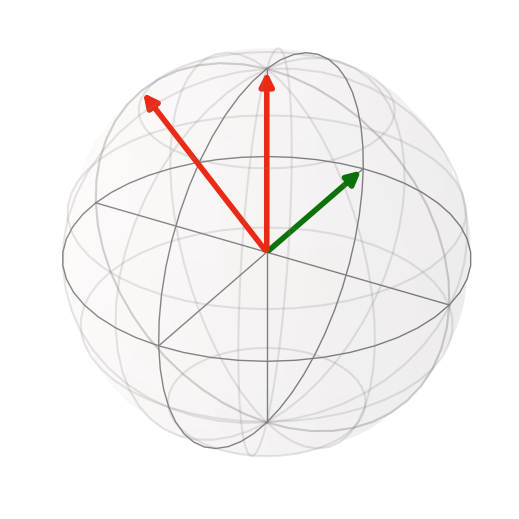

In [15]:
_bloch = Bloch()
_bloch.vector_color = ['#027101', '#ED220D', '#ED220D']
_bloch.sphere_alpha = 0.05
_bloch.vector_width = 4
_bloch.xlabel = ['', ' ']
_bloch.ylabel = ['', ' ']
_bloch.zlabel = ['','']
sv = []
sv.append([-1,0,0])
sv.append([0,-0.70710678118,0.70710678118])
sv.append([0,0,1])


_bloch.add_vectors(sv)

_bloch.save(f"{DIR_PREFIX}images/traj3.png")
_bloch.render()


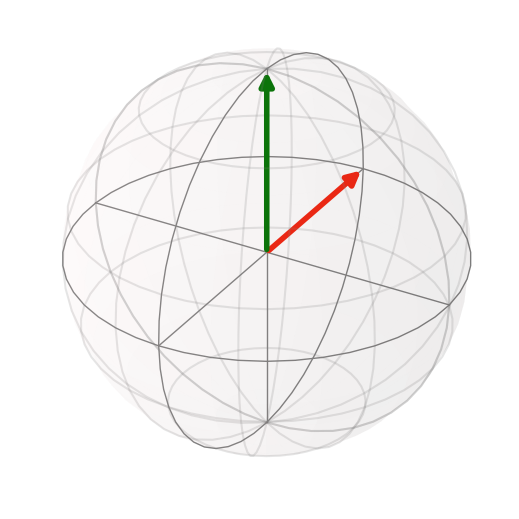

In [16]:
_bloch = Bloch()
_bloch.vector_color = ['#027101', '#ED220D', '#ED220D']
_bloch.sphere_alpha = 0.05
_bloch.vector_width = 4
_bloch.xlabel = ['', ' ']
_bloch.ylabel = ['', ' ']
_bloch.zlabel = ['','']
sv = []
sv.append([0,0,1])
sv.append([-1,0,0])


_bloch.add_vectors(sv)

_bloch.save(f"{DIR_PREFIX}images/traj4.png")
_bloch.render()


# Topology

In [21]:
import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")
from noise import *
from utils import *
from qiskit.visualization import plot_error_map

In [22]:
five_qubit_models = [FAKE_ATHENS, FAKE_BELEM, FAKE_TENERIFE,
    FAKE_LIMA, FAKE_ROME, FAKE_MANILA, FAKE_SANTIAGO, FAKE_BOGOTA, FAKE_OURENSE, FAKE_YORKTOWN, FAKE_ESSEX,
    FAKE_VIGO, FAKE_BURLINGTON, FAKE_QUITO, FAKE_LONDON]

In [46]:
# Precision.PRECISION = 7
# Precision.update_threshold()
# for model in five_qubit_models:
#     noise_model = get_ibm_noise_model(model)
#     display(plot_error_map(noise_model.hardware))

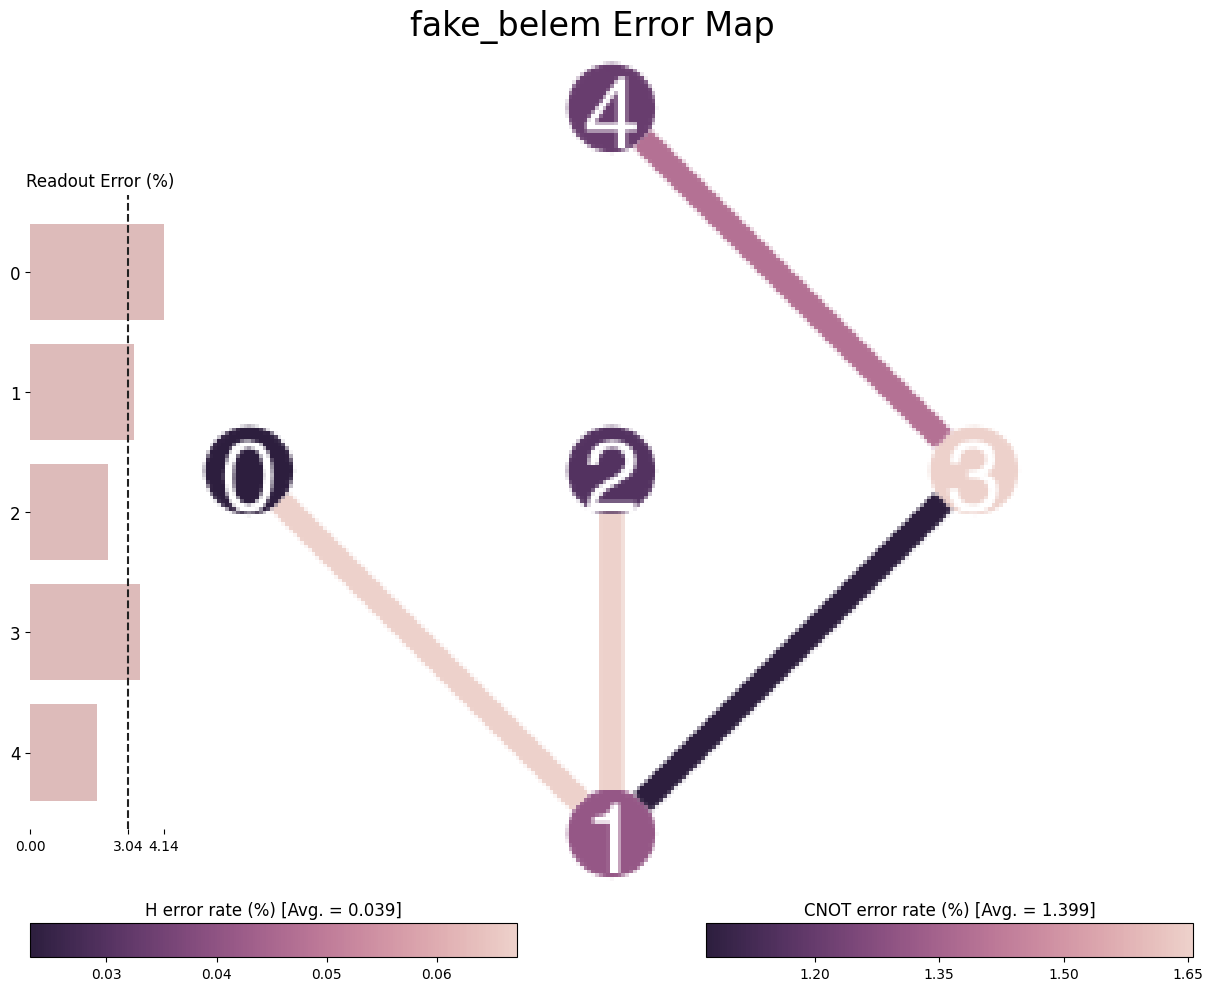

In [285]:
noise_model = get_ibm_noise_model(FAKE_BELEM)
noise_model.plot_topology()
plot_error_map(noise_model.hardware)

In [269]:
import seaborn as sns
num_colors = 12
palette = sns.color_palette("flare", n_colors=num_colors)

In [270]:
palette

[(0.92277222, 0.61701365, 0.45971384),
 (0.91416896, 0.54052962, 0.41396347),
 (0.90157824, 0.46275577, 0.37697105),
 (0.88217931, 0.38923439, 0.35995244),
 (0.84696243, 0.31979068, 0.36806976),
 (0.79244362, 0.2695883, 0.39342447),
 (0.72585394, 0.24300672, 0.41669383),
 (0.65162696, 0.22317307, 0.4327001),
 (0.57860222, 0.20328034, 0.44122241),
 (0.50908361, 0.18613639, 0.4408295),
 (0.43469046, 0.17148074, 0.42859124),
 (0.36109117, 0.15646169, 0.40672362)]

In [264]:

min_val = 1 - 0.9702058
max_val = 0.06604759999999998

In [265]:
for (success_prob, coupler) in noise_model.get_most_noisy_couplers():
    err  =1 - success_prob
    x = round(((err*(num_colors))/max_val))-1
    color = palette.as_hex()[x]
    print(coupler, color)

[2, 4] #b71c1c
[2, 3] #b71c1c
[1, 2] #bc2f2f
[4, 3] #c75555
[0, 1] #d79090
[0, 2] #dda3a3


In [359]:
for (success_prob, coupler) in noise_model.get_most_noisy_couplers():
    err  =1 - success_prob
    print(err)
    x = round(((err*(num_colors))/max_val))-1
    color = palette.as_hex()[x]
    print(coupler, color)

0.0206982
[0, 1] #e1635c
0.0206982
[1, 0] #e1635c
0.018436000000000008
[3, 4] #e67660
0.018436000000000008
[4, 3] #e67660
0.01742940000000004
[1, 3] #e67660
0.01742940000000004
[3, 1] #e67660
0.01336689999999996
[1, 2] #e98a6a
0.01336689999999996
[2, 1] #e98a6a


In [268]:
for (err, qubit) in noise_model.get_most_noisy_readout():
    print(float(err))

0.65425
0.79375
0.8795
0.90975
0.921


In [ ]:
max_val = 0.06020000000000003

In [361]:
for i in range(5):
    noise_data = noise_model.get_qubit_readout_error(i)
    probs = noise_data[0].probabilities
    success0 = probs[0][1]
    err0 = 1 - success0
    x0 = round(((err0*(num_colors))/max_val))-1
    success1 = probs[1][1]
    err1 = 1 - success1
    x1 = round(((err1*(num_colors))/max_val))-1
    print(err0, err1)
    print(i, palette.as_hex()[x0], palette.as_hex()[x1])

0.022599999999999953 0.06020000000000003
0 #e1635c #6f2c6d
0.009000000000000008 0.05500000000000005
1 #e98a6a #822f70
0.010399999999999965 0.03759999999999997
2 #e98a6a #b93e6a
0.010199999999999987 0.05779999999999996
3 #e98a6a #6f2c6d
0.0050000000000000044 0.03620000000000001
4 #eb9d75 #b93e6a


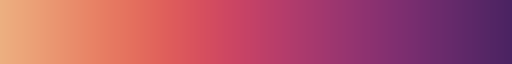

In [281]:
sns.color_palette("flare", n_colors=num_colors, as_cmap=True)

# Histogram

In [18]:
import random
def get_random_distribution(size=8):
    v = [random.randint(0,100) for x in range(8)]
    s = sum(v)
    result = [x/s for x in v]
    return result
    

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

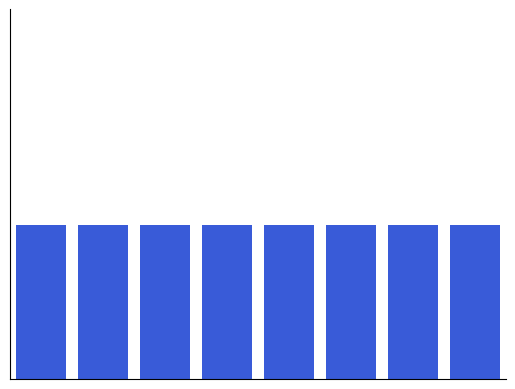

In [24]:
g = sns.barplot(y=[1/8 for _ in range(8)], x=[str(i) for i in range(8)], color="#1E4CF3")
g.tick_params(bottom=False, left=False) 
plt.ylim(0, 0.3)
g.set(xticklabels=[])
g.set_yticks([])
sns.despine()
plt.savefig(DIR_PREFIX+"/images/policy_dist0.png", format='png')

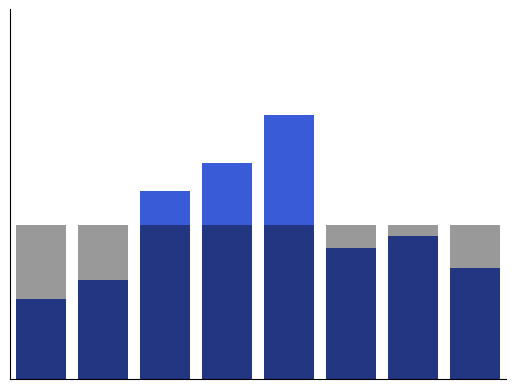

In [25]:
ax=plt.subplots()
 
#plotting columns


d = [0.06459948320413436, 0.08010335917312661, 0.1524547803617571, 0.17571059431524547, 0.2144702842377261, 0.10594315245478036, 0.11627906976744186, 0.09043927648578812]
ax=sns.barplot(x=[str(i) for i in range(8)],y=d, color="#1E4CF3")
ax=sns.barplot(y=[1/8 for _ in range(8)], x=[str(i) for i in range(8)], color="black", alpha=0.4)
ax.tick_params(bottom=False, left=False) 
plt.ylim(0, 0.3)
ax.set(xticklabels=[])
ax.set_yticks([])
sns.despine()

plt.savefig(DIR_PREFIX+"/images/policy_dist1.png", format='png')


In [26]:
fourval = 0.43
d2 = [0.06459948320413436, 0.08010335917312661, 0.1524547803617571, 0.17571059431524547, 0.2144702842377261, fourval, 0.11627906976744186, 0.09043927648578812]

for i in range(len(d2)):
    if i != 4:
        d2[i] = d2[i]*(1 - fourval)

s = sum(d2)

for i in range(len(d2)):
    d2[i] = d2[i]/s
sum(d2)

1.0

$   \dfrac{1}{\omega^0} + \dfrac{1}{\omega^s} + \dfrac{1}{\omega^{2s}} + \cdots + \dfrac{1}{\omega^{(r-1)s}} 
   = 1 + \omega^{-s} + \omega^{-2s} + \cdots + \omega^{-(r-1)s}
   = \dfrac{ 1 - \omega^{-rs}}{1-\omega^{-s}} = \dfrac{1-1}{1-\omega^{-s}} = 0.$

In [27]:
temp = d2[4]
d2[4] = d2[5]
d2[5] = temp

In [28]:
temp = d2[0]
d2[0] = d2[1]
d2[1] = temp

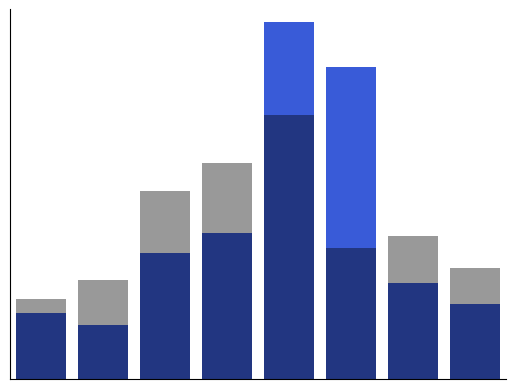

In [30]:
ax=plt.subplots()




ax=sns.barplot(x=[str(i) for i in range(8)],y=d2, alpha=1, color="#1E4CF3")

ax=sns.barplot(x=[str(i) for i in range(8)],y=d, color="black", alpha=0.4)
ax.tick_params(bottom=False, left=False) 
plt.ylim(0, 0.3)
ax.set(xticklabels=[])
ax.set_yticks([])
sns.despine()
plt.savefig(DIR_PREFIX+"/images/policy_dist2.png", format='png')

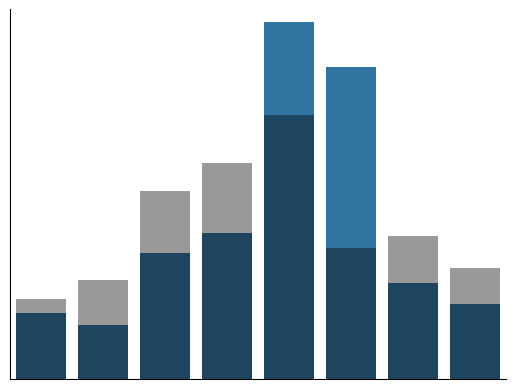

In [464]:
ax=plt.subplots()




ax=sns.barplot(x=[str(i) for i in range(8)],y=d2, alpha=1)

ax=sns.barplot(x=[str(i) for i in range(8)],y=d, color="black", alpha=0.4)
ax.tick_params(bottom=False, left=False) 
plt.ylim(0, 0.3)
ax.set(xticklabels=[])
ax.set_yticks([])
sns.despine()
plt.savefig(DIR_PREFIX+"/images/policy_dist2.png", format='png')

# POMDP sizes

In [1]:
import seaborn as sns
import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")

from bit_flip_experiments import backends_w_embs, get_num_embeddings

In [2]:
def get_num_states(backend, embedding_index, pomdps_index=""):
    f = open(DIR_PREFIX + f"pomdps{pomdps_index}/{backend}_{embedding_index}.txt")
    lines = f.readlines()
    states_line = lines[2]
    elements = states_line.split(" ")
    assert elements[0] == "STATES:"
    f.close()
    return len(elements[1].split(","))

In [3]:
count_states = set()
for backend in backends_w_embs:
    num_embeddings = get_num_embeddings(backend, DIR_PREFIX + "lambdas/")
    for embedding_index in range(num_embeddings):
        num_states =  get_num_states(backend, embedding_index)
        count_states.add(num_states)
count_states

{48}

In [4]:
count_states = set()
for backend in backends_w_embs:
    num_embeddings = get_num_embeddings(backend, DIR_PREFIX + "lambdas/")
    for embedding_index in range(num_embeddings):
        num_states =  get_num_states(backend, embedding_index, pomdps_index=1)
        count_states.add(num_states)
count_states

{193, 385}

# POMDP TIMES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def get_times_df(dir="analysis_results"):
    pomdp_build_times = dict()
    f = open(DIR_PREFIX + f"{dir}/pomdp_times.csv")
    lines = f.readlines()[1:]
    for line in lines:
        elements = line.split(',')
        backend = elements[0]
        embedding_index = int(elements[1])
        t = float(elements[2])
        if backend not in pomdp_build_times.keys():
            assert embedding_index == 0
            pomdp_build_times[backend] = dict()
        pomdp_build_times[backend][embedding_index] = t
    f.close()
    
    backends = []
    horizons = []
    pomdps_times = []
    bellman_times = []
    total_times = []

    f = open(DIR_PREFIX + f"{dir}/all_lambdas.csv")
    lines = f.readlines()[1:]
    for line in lines:
        elements = line.split(',')
        backend = elements[1]
        embedding_index = int(elements[2])
        horizon = int(elements[3])
  
        bellman_time = int(elements[-1])
        backends.append(f"{backend}{embedding_index}")
        horizons.append(horizon)
        pomdps_times.append(pomdp_build_times[backend][embedding_index])
        bellman_times.append(bellman_time)
        total_times.append(bellman_time + pomdp_build_times[backend][embedding_index])
        

    f.close()

    df = pd.DataFrame.from_dict({
        'hardware_spec': backends,
        'horizon': horizons,
        'pomdp_time': pomdps_times,
        'bellman_time': bellman_times,
    }) 

    return df
                

In [20]:
times_df0 = get_times_df()
times_df0['instruction_set'] = "IPMA"
times_df1 = get_times_df(dir="analysis_results1")
times_df1['instruction_set'] = "CX+H"

In [21]:
times_df0.describe()

,horizon,pomdp_time,bellman_time
count,900.000000,900.000000,900.000000
mean,5.500000,17.648528,1283.441111
std,1.118656,1.539368,1658.524157
min,4.000000,16.219289,29.000000
25%,4.750000,16.628152,116.750000
50%,5.500000,17.469684,437.000000
75%,6.250000,17.787841,1572.750000
max,7.000000,24.794434,4651.000000


In [22]:
times_df1.describe()

,horizon,pomdp_time,bellman_time
count,900.000000,900.000000,900.000000
mean,5.500000,391.535454,520.686667
std,1.118656,247.121926,1037.829296
min,4.000000,253.524769,10.000000
25%,4.750000,260.662915,43.000000
50%,5.500000,272.868235,179.500000
75%,6.250000,282.384083,775.000000
max,7.000000,917.494841,8844.000000


In [23]:
all_times = pd.concat([times_df0, times_df1])

In [24]:
new_times_df = all_times.melt(id_vars=["hardware_spec", "horizon", "instruction_set"], value_vars=['pomdp_time', 'bellman_time'])

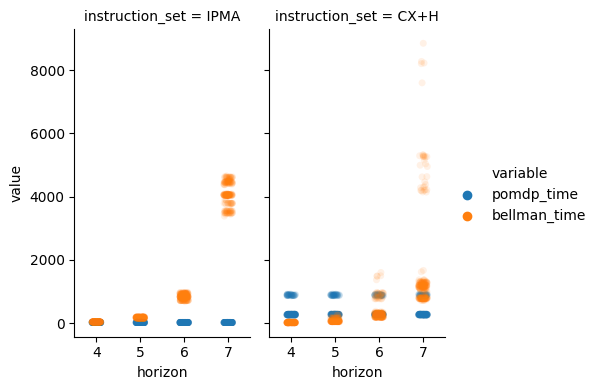

In [25]:
sns.catplot(
    data=new_times_df, x="horizon", y="value", hue="variable", col="instruction_set",
    kind="strip", height=4, aspect=.6, alpha=0.1
)

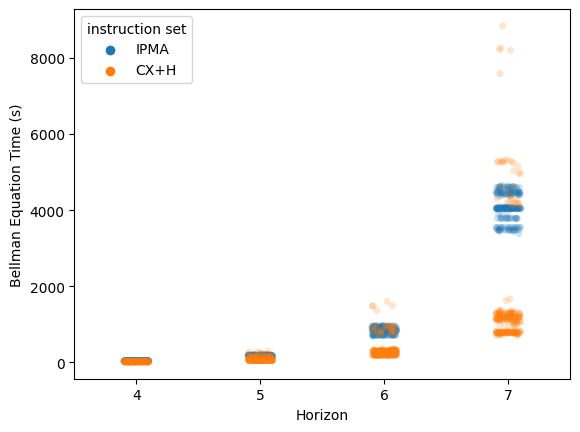

In [26]:
ax = sns.stripplot(data=all_times, x="horizon", y="bellman_time", alpha=0.2, hue="instruction_set")
plt.ylabel('Bellman Equation Time (s)')
plt.xlabel('Horizon')
ax.legend(title="instruction set")
plt.savefig(DIR_PREFIX+"/images/bellman_times.pdf", format='pdf')

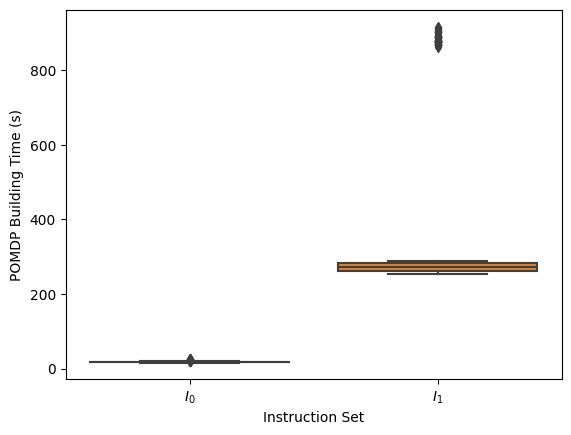

In [61]:
ax = sns.boxplot(data=all_times[all_times.horizon==4], x="instruction_set", y="pomdp_time")
plt.ylabel('POMDP Building Time (s)')
plt.xlabel('Instruction Set')
plt.savefig(DIR_PREFIX+"/images/pomdp_times.pdf", format='pdf')

# Finding channels examples

In [2]:
# Precision.PRECISION = 10
# Precision.update_threshold()
# noise_model = get_ibm_noise_model(FAKE_JAKARTA, thermal_relaxation=True)
# qubit = 0
# print(noise_model.get_noise_object(None, qubit, Instruction.X).probabilities)
# print(noise_model.get_noise_object(None, qubit, Instruction.X).apply_instructions)
# noise_model.get_qubit_readout_error(15)[0].probabilities